<a href="https://colab.research.google.com/github/moxie77/Simple-Linear_reg/blob/main/Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving CardioGoodFitness.csv to CardioGoodFitness (1).csv


In [5]:
data_ = pd.read_csv("CardioGoodFitness.csv")

In [6]:
data_.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
data_.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ade05c490>,
      dtype=object)

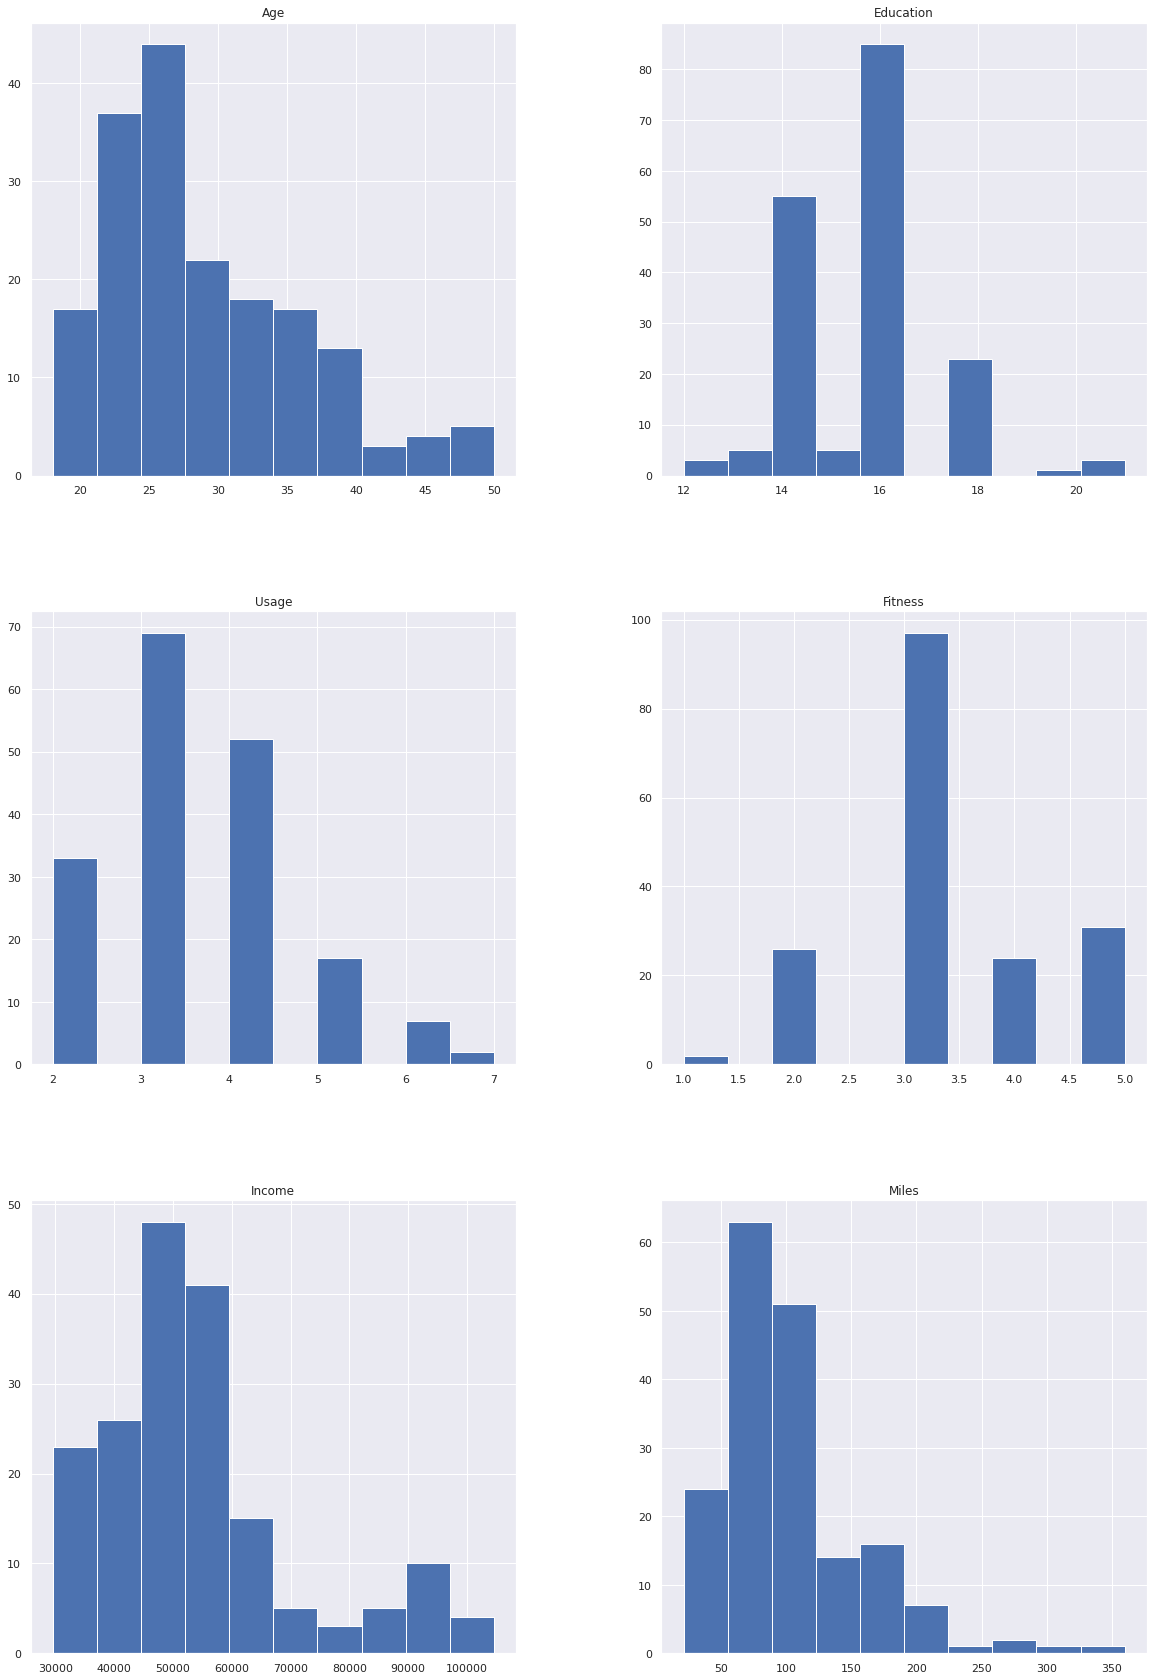

In [9]:
data_.hist(figsize=(20,30))

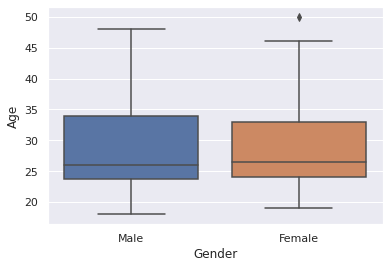

In [10]:
sns.boxplot(x="Gender", y="Age", data= data_)

In [11]:
pd.crosstab(data_["Product"],data_["Gender"])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [12]:
pd.crosstab(data_["Product"],data_["MaritalStatus"])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


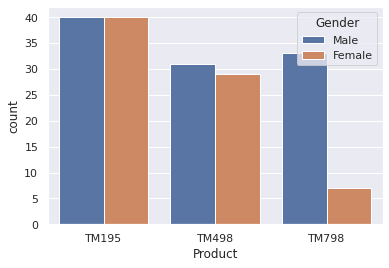

In [13]:
sns.countplot(x="Product", hue="Gender", data=data_)

In [14]:
pd.pivot_table(data=data_,index=["Product", "Gender"], columns=["MaritalStatus"], aggfunc=len)

Age        Education  ...  Miles     Usage       
MaritalStatus  Partnered Single Partnered  ... Single Partnered Single
Product Gender                             ...                        
TM195   Female        27     13        27  ...     13        27     13
        Male          21     19        21  ...     19        21     19
TM498   Female        15     14        15  ...     14        15     14
        Male          21     10        21  ...     10        21     10
TM798   Female         4      3         4  ...      3         4      3
        Male          19     14        19  ...     14        19     14

[6 rows x 12 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


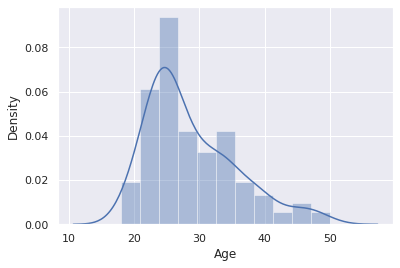

In [15]:
sns.distplot(data_["Age"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ad45e87d0>,
      dtype=object)

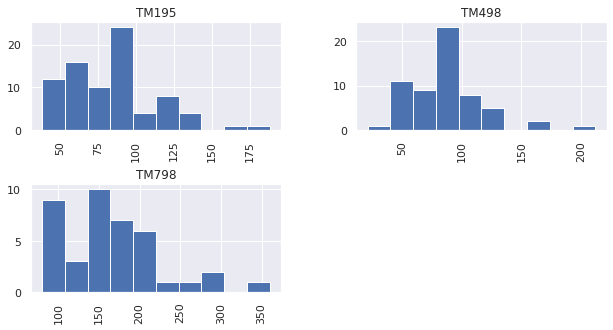

In [21]:
data_.hist(by="Product", column="Miles", figsize=(10, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ad46f8250>,
      dtype=object)

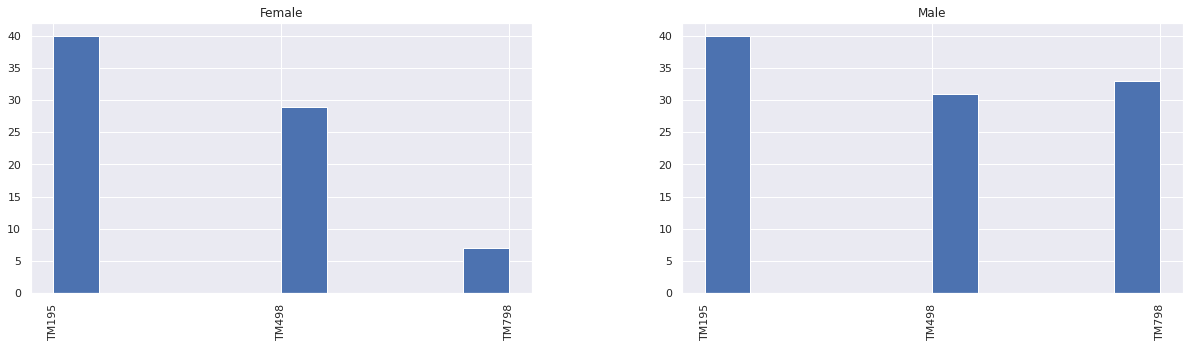

In [25]:
data_.hist(by="Gender", column="Product", figsize=(20, 5))

In [26]:
data_.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


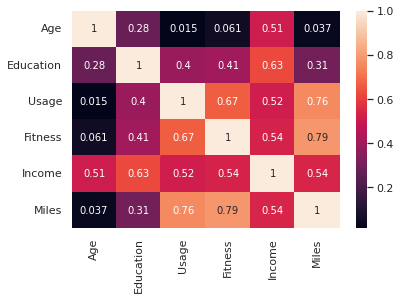

In [30]:
sns.heatmap(data_.corr(), annot= True)

In [37]:
# Simple Linear Regression

#Load function from sklearn
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

y = data_['Miles']
x = data_[['Usage','Fitness']]

# Train the model using the training sets
regr.fit(x,y)

LinearRegression()

In [38]:
regr.coef_

array([20.21486334, 27.20649954])

In [39]:
regr.intercept_

-56.74288178464862